In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [14]:
df=pd.read_csv("online food.csv")
print(df.to_string())
print(df.describe())
print(df.info())
df=df.dropn()

     Age  Gender     Marital Status      Occupation   Monthly Income Educational Qualifications  Family size  latitude  longitude  Pin code Output  Feedback Unnamed: 12
0     20  Female             Single         Student        No Income              Post Graduate            4   12.9766    77.5993    560001    Yes  Positive         Yes
1     24  Female             Single         Student   Below Rs.10000                   Graduate            3   12.9770    77.5773    560009    Yes  Positive         Yes
2     22    Male             Single         Student   Below Rs.10000              Post Graduate            3   12.9551    77.6593    560017    Yes  Negative         Yes
3     22  Female             Single         Student        No Income                   Graduate            6   12.9473    77.5616    560019    Yes  Positive         Yes
4     22    Male             Single         Student   Below Rs.10000              Post Graduate            4   12.9850    77.5533    560010    Yes  Positiv

AttributeError: 'DataFrame' object has no attribute 'dropn'

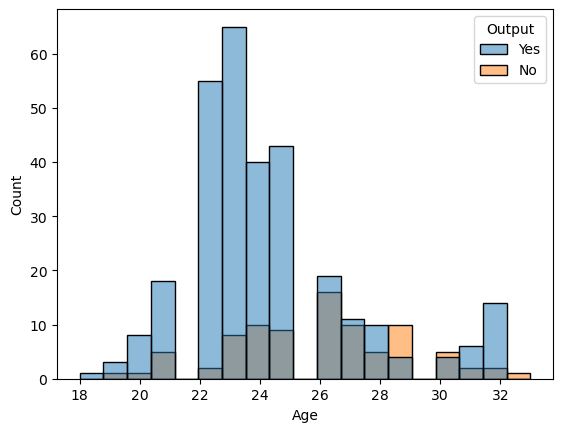

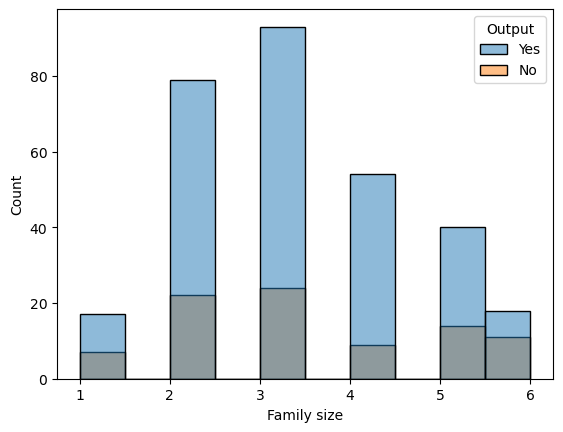

In [15]:
sns.histplot(data=df, x="Age", hue="Output")
plt.show()

sns.histplot(data=df, x="Family size", hue="Output")
plt.show()

In [16]:
df["Marital Status"] = df["Marital Status"].map({"Single": 1, "Married": 2, "Prefer not to say": 0})
df["Occupation"] = df["Occupation"].map({"Student": 1, "Employee": 2, "Self Employed": 3, "House Wife": 4})
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0, "25001 to 50000": 50000, "More than 50000": 70000, "10001 to 25000": 25000, "Below Rs.10000": 10000})
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1, "Post Graduate": 2, "PhD": 3, "School": 4, "Uneducated": 5})
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Feedback"] =df ["Feedback"].map({"Positive": 1, "Negative": 0})

print(df.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1         1.0               0   
1   24       0               1         1.0           10000   
2   22       1               1         1.0           10000   
3   22       0               1         1.0               0   
4   22       1               1         1.0           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                         2.0            4   12.9766    77.5993    560001   
1                         1.0            3   12.9770    77.5773    560009   
2                         2.0            3   12.9551    77.6593    560017   
3                         1.0            6   12.9473    77.5616    560019   
4                         2.0            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

In [20]:
X=df[["Age", "Gender","Marital Status", "Occupation", "Monthly Income", "Educational Qualifications", "Family size", "Pin code", "Feedback"]]
y=df["Output"].map({"Yes": 1, "No": 0})

print(df.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1         1.0               0   
1   24       0               1         1.0           10000   
2   22       1               1         1.0           10000   
3   22       0               1         1.0               0   
4   22       1               1         1.0           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                         2.0            4   12.9766    77.5993    560001   
1                         1.0            3   12.9770    77.5773    560009   
2                         2.0            3   12.9551    77.6593    560017   
3                         1.0            6   12.9473    77.5616    560019   
4                         2.0            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10)

In [22]:
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('online food.csv')

# Preprocess the data
# Handle missing values
df.fillna(df.mean(), inplace=True)  # Example for numerical columns

# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])

# One-hot encode multi-class categorical variables
df = pd.get_dummies(df, columns=['Occupation', 'Educational Qualifications', 'Feedback from Previous Orders'])

# Define features and target
X = df.drop('Repeat Buyer Status', axis=1)
y = df['Repeat Buyer Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Example of using the model for marketing strategy
# Identify potential repeat customers
potential_repeat_customers = X_test[y_pred == 1]
print("Potential Repeat Customers:")
print(potential_repeat_customers)